# Линейная регрессия

## Проблемы

* Что будет завтра? -- интерпретация не важна
* Почему так? -- интерпретация важна

## Библиотеки

* [Statsmodels](http://statsmodels.sourceforge.net/) -- интерпретации моделей
* [scikit-learn](http://scikit-learn.org/stable/) -- популярная библиотека для машинного обучения, которая предлагает множество других методов помимо линейной регресии.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Advertising Dataset


In [3]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


- TV: доллары, потраченные на ТВ рекламу для одного продукта на данном рынке (в тысячах долларов)
- Radio: доллары, потраченные на радио рекламу
- Newspaper: доллары, потраченные на рекламу в газетах
- Sales: продажи одного продукта на данном рынке (в тысячах)

**Признаки / регрессоры / независимые переменные**: TV, Radio, Newspaper.

**Зависимая переменная**: Sales.

In [4]:
# print the shape of the DataFrame
data.shape

(200, 4)

В нашей выборке 200 **наблюдений**.

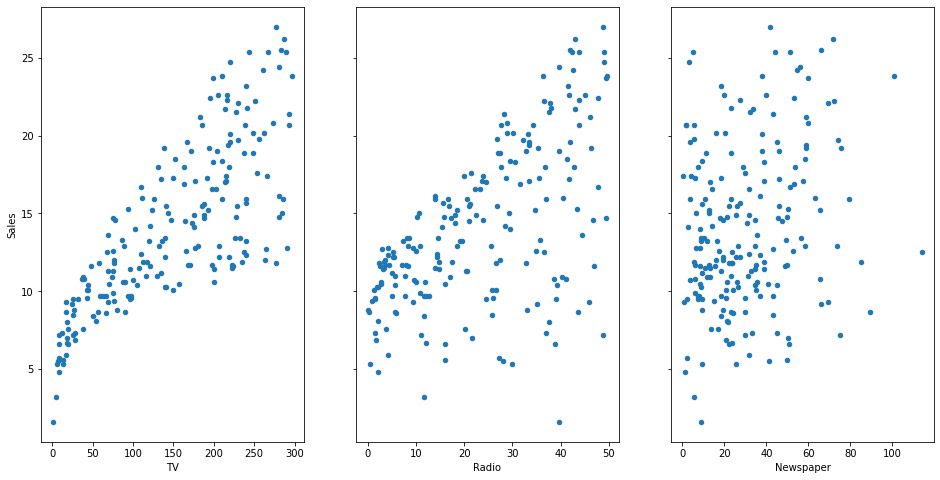

In [5]:
# visualize the relationship between the features and the response using scatterplots
_, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

## Вопросы

### Главный вопрос
* Распределение рекламных средств

### Отдельные вопросы:
1. Существует ли связь между рекламой и продажами?
2. Насколько сильны эти отношения?
3. Какие типы рекламы способствуют росту продаж?
4. Зная расходы на рекламу на конкретном рынке, можем ли мы предсказать продажи?


## Одномерная линейная регрессия

Простая линейная регрессия -- это подход к прогнозированию **количественной переменной** с использованием **одного признака**:

$y = \beta_0 + \beta_1x$

- $y$ это зависимая переменная
- $x$ это независимая переменная
- $\beta_0$ это свободный член
- $\beta_1$ это коэффициент при признаке $x$

$\beta_0$ и $\beta_1$ -- **коэффициенты модели**. Чтобы создать свою модель, вы должны "обучить" значения этих коэффициентов. И как только мы "обучим" эти коэффициенты, мы сможем использовать модель.

Если между $x$ и $y$ есть взаимосвязь, то это означает, что $\beta_1 \ne 0$. Т.е. нам необходимо проверить гипотезу:

$$
\begin{gathered}
  H_0: \beta_1 = 0,\\
  H_a: \beta_1 \ne 0.
\end{gathered}
$$

Если $H_0$ отвергается, то мы считаем, что $\beta_1\ne 0$ и, следовательно, существует статистически значимая связь между $x$ и $y$. 
Если же не отвергается, то у нас есть несущественное свидетельство, чтобы считать, что взаимосвязь всё же есть. 

$b_1$ -- оценка $\beta_1$.

$$
\begin{gathered}
  \mathbb{E}(b_1) = \beta_1,\\
  \sqrt{\mathbb{D}(b_1)}=\sigma_{b_1} = \frac{\sigma}{\sqrt{\Sigma(x_i-\bar{x}_i)^2}},\\
  b \sim N.
\end{gathered}
$$

$$
\begin{gathered}
  s = RMSE = \sqrt{MSE},\\
  s_{b_1} = \frac{s}{\sqrt{\Sigma(x_i-\bar{x}_i)^2}}.
\end{gathered}
$$

### $t$-test

$t$-тест о связи основан на том факте, что тестовая статистика 
$$
\begin{gathered}
  t=\frac{b_1 - \beta_1}{s_{b_1}}
\end{gathered}
$$
подчиняется $t$ распределению с $n-2$ степенью свободы. Если $H_0$ верна, то $\beta_1 = 0$ и $t=b_1/s_{b_1}$.

Мы отвергаем $H_0$, если $\mathrm{p-value} \leqslant \alpha$ или если $t \leqslant -t_{\alpha/2}~||~t \geqslant t_{\alpha/2}$, где $t_{\alpha/2}$ основано на $t$ распределении с $n-2$ степенями свободы.

#### Доверительный интервал

$\gamma$-доверительный интервал ($\gamma=1-\alpha$) для $\beta_1$:

$$
\beta_1 \in (b_1 - t_{\alpha/2}s_{b_1}; b_1 + t_{\alpha/2}s_{b_1})
$$

### F-test

$SSR$ -- sum of squares due to regression.

$$
  SSR = \sum(\hat{y}_i-\bar{y})^2
$$

F-test основан на двух независимых оценках $\sigma^2$. 

Если $H_0: \beta_1 = 0$ верна, 
$$
MSR=\frac{SSR}{Regression\text{ }DoF},
$$
где $MSR$ -- mean square regression, DoF -- степени свободы (считаем, что равно количеству независимых переменных).

Если $H_0$ гипотеза верна, то $MSR$ и $MSE$ -- два независимых estimator $\sigma^2$ и выборочное распредление $MSR/MSE \sim F(1, n-2)$. Следовательно, если $\beta_1 = 0$, то 
$MSR/MSE \approx 1$. Если $H_0$ не верна, то отношение увеличивается, что склоняет нас отклонить гипотезу $H_0$, т.е. считать, что существуют статически значимая взаимосвязь.

Мы отклоняем $H_0$, если $\mathrm{p-value} \leqslant \alpha$ или $F\geqslant F_\alpha$, где $F_\alpha$ основано на $F(1, n-2)$ распределении.

## Оценка ("обучение") коэффициентов модели

Давайте попробуем использовать **Statsmodels** для оценки коэффициентов модели на наших данных

In [6]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params


Intercept    7.032594
TV           0.047537
dtype: float64

In [7]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        19:31:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Интерпретация коэффициентов модели

Как мы интерпретируем TV коэффициент ($\beta_1$)?
* Дополнительные 1000 долларов, потраченные на телевизионную рекламу, увеличивают продажы на 47,537 товаров.

Обратите внимание, что если бы увеличение расходов на телевизионную рекламу было связано с **снижением** продаж, $\beta_1$ был бы **отрицательным**.

## Использование модели для прогнозирования

Допустим, появился новый рынок, на котором расходы на телевизионную рекламу составили **$50,000**. Что бы мы спрогнозировали для продаж на этом рынке?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \cdot 50$$

In [8]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Таким образом, мы могли бы предсказать продажи **9409 товаров** на этом рынке.

Конечно, мы также можем использовать Statsmodels  для прогнозирования:

In [9]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [10]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

## Построение линии наименьших квадратов

Давайте сделаем прогнозы для **наименьших и наибольших наблюдаемых значений x**, а затем используем предсказанные значения для построения линии наименьших квадратов:

In [11]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [12]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

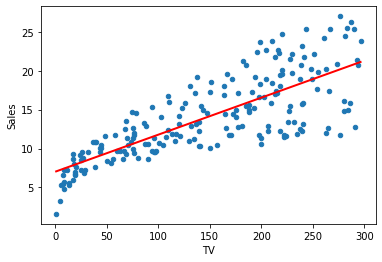

In [13]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

## Экспоненциальная регрессия, сводящаяся к линейной

Допустим, что наша модель описывается не линейным уравнением:
$$
y=\beta_0 + \beta_1 \cdot x,
$$
а экспоненциальным:
$$
y=z^\alpha \cdot x^{\beta_1}.
$$

Логорифмируя левую и правую часть, получим:
$$
\ln y = \alpha\ln z + \beta_1 \ln x.
$$ 

Заменив $\ln y$ на $y^\prime$, $\ln x$ на $x^\prime$, а $\alpha\ln z$ на $\beta_0$ получим:

$$
y^\prime = \beta_0 + \beta_1 x^\prime 
$$

Попробуем построить модель по таким данным.

Логарифмируем sales и TV.

In [14]:
data['ln_Sales'] = data['Sales'].apply(np.log)
data['ln_TV'] = data['TV'].apply(np.log)

Строим модель:

In [15]:
lnm = smf.ols(formula='ln_Sales ~ ln_TV', data=data).fit()
lnm.params

Intercept    0.905245
ln_TV        0.355036
dtype: float64

Обращаем внимание на то, что $\mathrm{ln\_ TV} < 1$.

Строим график.

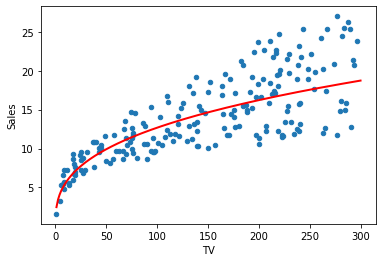

In [16]:
xs = np.linspace(1, 300, 200)
X_new = pd.DataFrame({'ln_TV': np.log(xs)})

#Возвращаемся в исходные значения
preds = np.exp(lnm.predict(X_new))

data.plot(kind="scatter", x="TV", y="Sales")
plt.plot(xs, preds, c='red', linewidth=2)
plt.show()


Построим график в логарифмических шкалах.

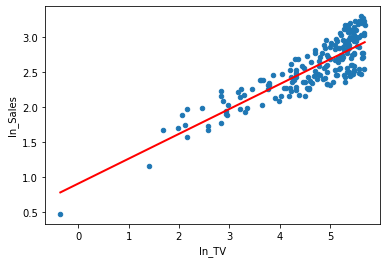

In [18]:
X_new = pd.DataFrame({'ln_TV': [data.ln_TV.min(), data.ln_TV.max()]})
preds = lnm.predict(X_new)

# first, plot the observed data
data.plot(kind='scatter', x='ln_TV', y='ln_Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

## Насколько хорошо модель соответствует данным?

Одним из способом оценки качества линейной модели является значение коэффициента детерминации -- $R^2$. $R^2$ -- это **это доля объяснённой суммы квадратов в общей**:

$$
R^2 = 1 - \frac{SS_{RES}}{SS_{TOT}} = 1 - \frac{\sum_i(y_i-\hat{y}_i)^2}{\sum_i(y_i-\bar{y}_i)^2}
$$

$R^2$ для нашей модели:

In [52]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

У нашей логарифмической модели:

In [53]:
lnm.rsquared

0.7421363059546486

Является ли это "хорошим" значением R-квадрата? Трудно сказать. Порог для хорошего значения R-квадрата широко зависит от области. Поэтому он наиболее полезен в качестве инструмента для **сравнения различных моделей**. Но вообще это не хороший инструмент, с кучей проблем. Главная из которых: $R^2$ не уменьшается от добавления в модель новых переменных, даже если эти переменные никакого отношения к зависимой переменной не имеют. Об этом ещё поговорим позже.

Способ это починить: скорректированный $R^2$ -- adjusted $R^2$.

$$
\bar{R}^2=R^2_{adj}=1-\frac{SS_{RES}/(n-k)}{SS_{TOT}/(n-1)}=1-(1-R^2)\frac{n-1}{n-k}
$$

$R^2_{adj}$ даёт штраф за дополнительно включённые факторы, где $n$ -- количество наблюдений, а $k$ -- количество параметров.


## Множественная линейная регрессия

Простая линейная регрессия может быть легко расширена для включения нескольких объектов. Это называется **множественной линейной регрессией**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_px_p$

Каждый $x$ представляет собой отдельный признак и имеет свой собственный коэффициент. В нашем случае:

$y = \beta_0 + \beta_1 \cdot TV + \beta_2 \cdot Radio + \beta_3 \cdot Newspaper$

In [54]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

Как мы интерпретируем эти коэффициенты? Для данной суммы расходов на рекламу на радио и в газетах **увеличение расходов на рекламу на телевидении на 1000 долларов увеличивает продажы на 45,765**. 


### F тест

$$
\begin{gathered}
  H_0: \beta_1=\beta_2\dots = \beta_p = 0,\\
  H_a: \exist i : \beta_i\ne 0
\end{gathered}
$$

$$
\begin{gathered}
  MSR = \frac{SSR}{p},\\
  MSE = \frac{SSE}{n-p-1}.
\end{gathered}
$$

$$
  F=\frac{MSR}{MSE} \sim F(p, n-p-1).
$$

Мы отклоняем $H_0$, если $\mathrm{p-value} \leqslant \alpha$ или $F\geqslant F_\alpha$, где $F_\alpha$ основано на $F(p, n-p-1)$ распределении.

## Несколько слов про значимость полученных результатов

Нужно понимать, что **коэффициенты полученные нами это случайные величины**. В нашем примере, например, можно сказать, что **реклама в газетах уменьшает количество проданного товара**, тк коэффициент перед сооствествующим коэффициентом отрицательный. Однако, из-за того, что коэффициент маленький **так могло произойти случайно**. 

In [55]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        13:48:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Что можно увидеть по результатам выше?

* У TV и Radio -- значимое $\mathrm{p-value}$, а у Newspaper -- нет.
* Расходы на рекламу на телевидении и радио **положительно связаны** с продажами, в то время как расходы на рекламу в газетах **незначимо отрицательно связаны** с продажами.
* Эта модель имеет более высокий $R^2$ ($0,897$), чем предыдущая модель, что означает, что эта модель обеспечивает лучшее соответствие данным, чем модель, включающая только TV.

## Переобучение (overfitting)


Как мы уже говорили, выбор модели с наибольшим $R^2$ не является надежным подходом для выбора наилучшей линейной модели.


![](https://miro.medium.com/max/875/1*_7OPgojau8hkiPUiHoGK_w.png)

In [56]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [57]:
lm.rsquared_adj

0.8961505479974428

In [58]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

In [59]:
lm.rsquared_adj

0.8956373316204668

In [60]:
data["Random"] = np.random.normal(-100, 100, data.shape[0])
data["Random2"] = np.random.normal(-100, 100, data.shape[0])
data["Random3"] = np.random.normal(-100, 100, data.shape[0])
data["Random4"] = np.random.normal(-100, 100, data.shape[0])
data["Random5"] = np.random.normal(-100, 100, data.shape[0])

lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper + Random + Random2 + Random3 + Random4 + Random5', data=data).fit()
lm.rsquared

0.9005534608199222

In [61]:
lm.rsquared_adj

0.8963881607495524

Это проблема, о которой мы ещё поговорим ~~завтра~~ позже.

## Линейная регрессия в scikit-learn


In [62]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [63]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820445),
 ('Newspaper', -0.0010374930424763285)]

In [64]:
# predict for a new observation
X_new = pd.DataFrame({'TV': [100], 'Radio': [25], 'Newspaper': [25]})
preds = lm.predict(X_new)
preds

array([12.20266701])

In [65]:
# calculate the R-squared
lm.score(X, y)

0.8972106381789522

Заметим, что **scikit-learn предоставляет сильно меньше информации** по сравнению с Statsmodels.

## Обработка категориальных предикторов с двумя категориями

До сих пор все наши предсказатели были числовыми. Что, если один из наших предсказателей был категориальным?

Давайте создадим новый бинарный признак под названием **Size** с двумя возможными значениями: **маленький или большой**:

In [66]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,ln_Sales,ln_TV,Random,Random2,Random3,Random4,Random5,Size
1,230.1,37.8,69.2,22.1,3.095578,5.438514,-234.089625,-102.667080,-209.743975,107.141327,-154.468929,large
2,44.5,39.3,45.1,10.4,2.341806,3.795489,84.688341,-208.566303,-87.156591,-236.476311,-24.974939,small
3,17.2,45.9,69.3,9.3,2.230014,2.844909,-232.886541,-211.473776,-151.897121,12.206602,-82.737639,small
4,151.5,41.3,58.5,18.5,2.917771,5.020586,68.270572,-105.821575,-50.462157,-93.315302,-105.905226,small
5,180.8,10.8,58.4,12.9,2.557227,5.197391,-271.769319,-148.676812,-180.181983,75.198663,-120.401125,large


Для scikit-learn нам нужно представить все данные **в числовом формате**. Если функция имеет только две категории, мы можем просто создать **фиктивную переменную**, которая представляет категории как бинарное значение:

In [67]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,ln_Sales,ln_TV,Random,Random2,Random3,Random4,Random5,Size,IsLarge
1,230.1,37.8,69.2,22.1,3.095578,5.438514,-234.089625,-102.667080,-209.743975,107.141327,-154.468929,large,1
2,44.5,39.3,45.1,10.4,2.341806,3.795489,84.688341,-208.566303,-87.156591,-236.476311,-24.974939,small,0
3,17.2,45.9,69.3,9.3,2.230014,2.844909,-232.886541,-211.473776,-151.897121,12.206602,-82.737639,small,0
4,151.5,41.3,58.5,18.5,2.917771,5.020586,68.270572,-105.821575,-50.462157,-93.315302,-105.905226,small,0
5,180.8,10.8,58.4,12.9,2.557227,5.197391,-271.769319,-148.676812,-180.181983,75.198663,-120.401125,large,1


In [68]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.04571982092436277),
 ('Radio', 0.1887281431342785),
 ('Newspaper', -0.0010976794483517072),
 ('IsLarge', 0.05742385085482798)]

Как мы интерпретируем **IsLarge коэффициент**? Для данного объема расходов на рекламу на телевидении/радио/в газетах наличие большого рынка связано со средним **увеличением** продаж на 57,42 (по сравнению с небольшим рынком, который называется **базовым значением**).

Если бы мы изменили кодировку 0/1 и вместо этого создали признак "IsSmall"? Коэффициент будет тем же самым, за исключением того, что он будет отрицательным, а не положительным.

## Обработка категориальных предикторов с более чем двумя категориями

Давайте создадим новый признак под названием **Area** и случайным образом назначим наблюдения **rural, suburban, или urban**:

In [69]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums >= 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,ln_Sales,ln_TV,Random,Random2,Random3,Random4,Random5,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,3.095578,5.438514,-234.089625,-102.667080,-209.743975,107.141327,-154.468929,large,1,rural
2,44.5,39.3,45.1,10.4,2.341806,3.795489,84.688341,-208.566303,-87.156591,-236.476311,-24.974939,small,0,urban
3,17.2,45.9,69.3,9.3,2.230014,2.844909,-232.886541,-211.473776,-151.897121,12.206602,-82.737639,small,0,rural
4,151.5,41.3,58.5,18.5,2.917771,5.020586,68.270572,-105.821575,-50.462157,-93.315302,-105.905226,small,0,urban
5,180.8,10.8,58.4,12.9,2.557227,5.197391,-271.769319,-148.676812,-180.181983,75.198663,-120.401125,large,1,suburban


Мы должны представлять область численно, но мы не можем просто кодировать ее как 0=Сельская, 1=Пригородная, 2=городская, потому что это означало бы упорядоченное отношение между пригородом и городом (и, таким образом, город каким-то образом "дважды" является пригородной категорией).

Вместо этого мы создаем **еще одну фиктивную переменную**:

In [70]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,ln_Sales,ln_TV,Random,Random2,Random3,Random4,Random5,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,3.095578,5.438514,-234.089625,-102.667080,-209.743975,107.141327,-154.468929,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,2.341806,3.795489,84.688341,-208.566303,-87.156591,-236.476311,-24.974939,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,2.230014,2.844909,-232.886541,-211.473776,-151.897121,12.206602,-82.737639,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,2.917771,5.020586,68.270572,-105.821575,-50.462157,-93.315302,-105.905226,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,2.557227,5.197391,-271.769319,-148.676812,-180.181983,75.198663,-120.401125,large,1,suburban,1,0


Вот как мы интерпретируем кодировку:
- **сельский** кодируется как Area_suburban=0 и Area_urban=0
- **suburban** кодируется как Area_suburban=1 и Area_urban=0
- **urban** кодируется как Area_suburban=0 и Area_urban=1

Почему нам нужны только **две фиктивные переменные, а не три?** потому что две дамми переменные захватывают всю информацию об признаке Area и неявно определяют сельскую местность как базовое значение. (В общем случае, если у вас есть категориальный признак с k уровнями, вы создаете фиктивные переменные k-1.)

Если это сбивает с толку, подумайте о том, почему нам нужна только одна фиктивная Переменная для размера (IsLarge), а не две фиктивные переменные (IsSmall и IsLarge).

Давайте включим в модель две новые фиктивные переменные:

In [71]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.045744010363313735),
 ('Radio', 0.18786669552525811),
 ('Newspaper', -0.0010876977267108012),
 ('IsLarge', 0.0773966074974793),
 ('Area_suburban', -0.10656299015958601),
 ('Area_urban', 0.2681380216522008)]

Как мы интерпретируем коэффициенты?
- Если все остальные переменные фиксированны, то быть **пригородным** районом, влечет **снижение** продаж на 106,56  (по сравнению с базовым уровнем, который является сельским).
- Быть **городским** районом связано со средним **увеличением** продаж на 268,13 (по сравнению с сельским районом).

**Заключительное замечание о фиктивном кодировании:** если у вас есть категории, которые можно ранжировать (например, полностью не согласен, не согласен, нейтрален, согласен, полностью согласен), вы можете использовать одну фиктивную переменную и представлять категории численно (например, 1, 2, 3, 4, 5).

## Стандартизация

Часто рекомендуется скалировать признаки, чтобы у независимых переменных среднее было $0$. Это позволяет легче интерпретировать $\beta_0$, как ожидаемое значение $y$, когда все значения независимых переменных равны их среднему. 

Несколько вещей заставляют задумываться о центрировании признаков:
* Когда переменная очень большого масштаба, например, если вы используете размер населения страны как независимую переменную, то коэффициенты регрессии будут очень маленького порядка колебания (например $10^-9$), что может мешать при чтении вывода. Так что можно или конвертировать данные, в случае с населением, например, в миллионы, или просто нормализировать данные.
* Когда используете степенные члены. Например, у вас есть переменная $x$, которая колеблется от 1 до 2, но вы подозреваете нелинейные отношения с зависимой переменной, так что вы ипользуете $x^2$ как член регрессионного многочлена. Если вы не отцентрируете X сначала, то ваш квадратный член будет сильно зависить от $X$, что может помешать оценке $\beta$. Центрирование решает эту проблему.
* Создание пересекающихся членов. Если пересекающийся член/член произведение, созданный из двух перменных, которые не отцентрированны к 0, некоторое количество коллиниарности будет произведено.

**Центирование скалирование не влияет на статистические выводы в моделях регрессии** -- оценки корректируются соответствующим образом, и $\mathrm{p-value}$ будут одинаковыми. Масштаб и расположение независимых переменных никак не влияют на достоверность регрессионной модели.

Суммируя, технически, скалирование признаков не меняет результат регресии, но даёт нам некоторые практические выгоды в дальнейших инженерных шагах.

## Что рассмотрим на следующей паре?

* Разбиение на обучающую и тренировочную выборки
* Обнаружение мультиколлинеарности
* Регуляризацию
* Feature Selection


## Используемые источники

* https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
* Statistics for Business and Economics, Eleventh Edition David R. Anderson, Dennis J. Sweeney, Thomas A. Williams